# Hierarchal Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

This dataset collect data of different car models including miles per gallon, cylinder, engine displacement, power, etc...

Import the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pg-88/ARTIFICIAL-INTELLIGENCE-MACHINE-LEARNING/refs/heads/main/Risorse/dataset/mpg.csv')

Clean up: find if there are missing value and if data type is consistent 

Overview of statistical indicator

Deal with categorical features

In [7]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

Names of the cars is just a description and doesn't gives us any more information

In [21]:
df['name'].nunique()
# df[df.duplicated(subset='name')]
# df[df['name'] == 'chevrolet chevelle malibu']

301

Dropping name columns and get dummies columns

-----

**Scaling data**

In [24]:
from sklearn.preprocessing import MinMaxScaler

help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

Using min max scaler we can predict the max distance between points

Let's take a look to scaled data 

Scaled data is in array form, for ease of operation let's transform it in a DataFrame

In [ ]:
# cluster map

In [ ]:
# seaborn allow us to plot some graph specifically for hierarchical cluster

## Using Scikit-Learn

In [30]:
from sklearn.cluster import AgglomerativeClustering

help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

In [ ]:
# create the model

In [ ]:
# apply the model to data

In [28]:
plt.figure(figsize=(12,4),dpi=200)
# plot the result 

<Figure size 2400x800 with 0 Axes>

<Figure size 2400x800 with 0 Axes>

## Exploring Number of Clusters with Dendrograms

Make sure to read the documentation online!
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Assuming every point starts as its own cluster

Using the treshold argument allow us to impose a cut off on the maximum distance between points

In [ ]:
# create a cluster label with all the possible point

In [29]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

## Linkage Model

In [ ]:
# linkage_matrix =

In [ ]:
linkage_matrix

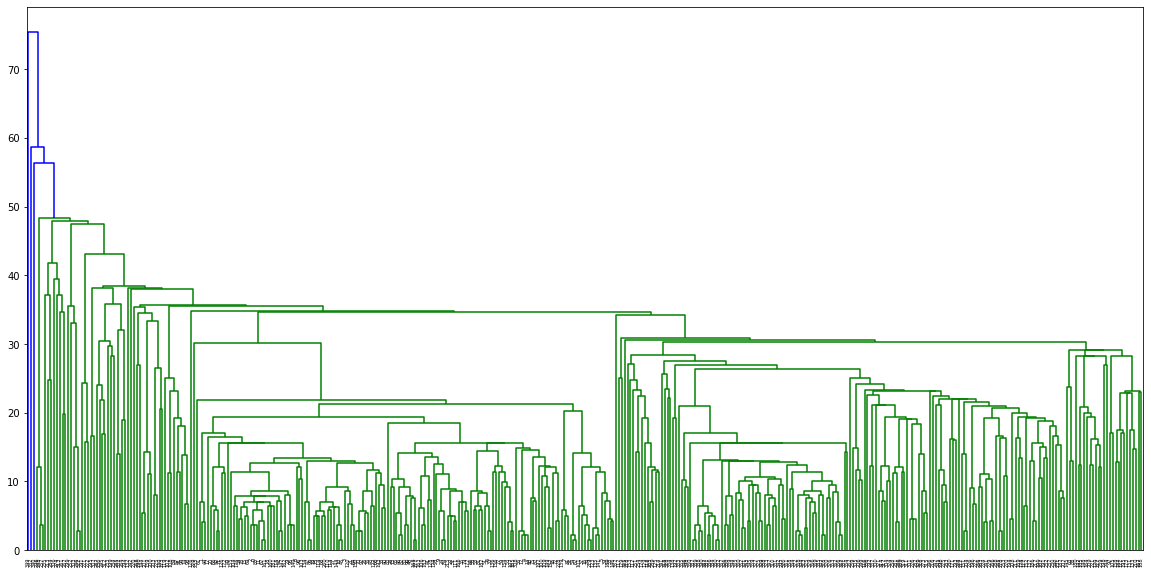

In [29]:
plt.figure(figsize=(20,10))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix)

Where to 'cut' the dendrogram?

### Choosing a Threshold Distance

**What is the distance between two points?**

In [33]:
# https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy


#### Max possible distance?

Recall Euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance

3.1622776601683795

### Creating a Model Based on Distance Threshold

* distance_threshold
    * The linkage distance threshold above which, clusters will not be merged.

How many cluster have we found?

### Linkage Matrix

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

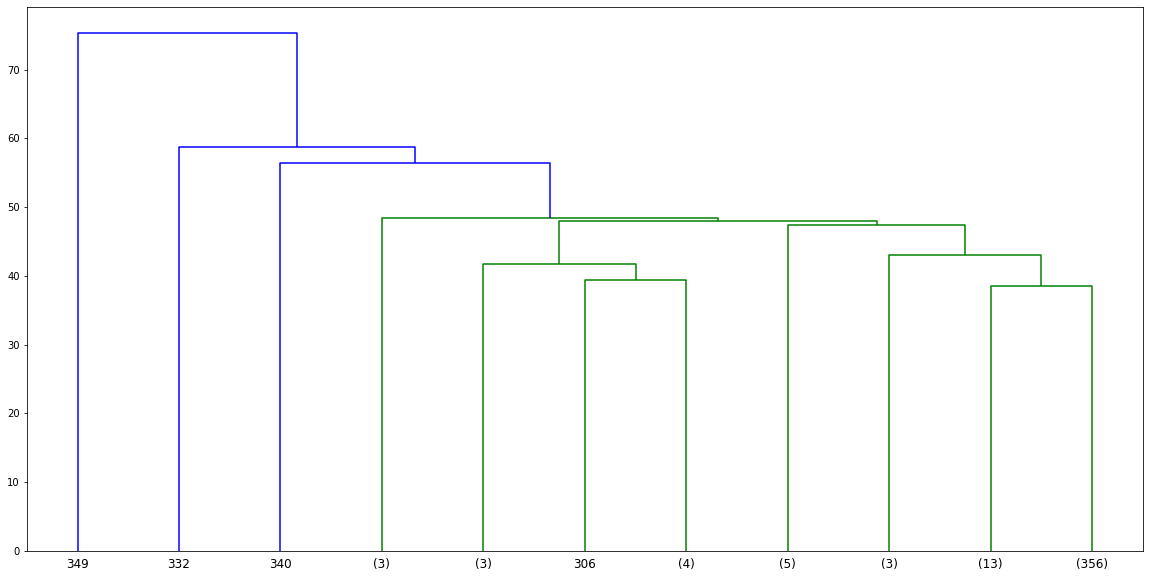